# Machine learning model building pipeline: ML

In [3]:
#TO handle the dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#To build the models
from sklearn.linear_model import Lasso

#To ecaluate this models
from sklearn.metrics import mean_squared_error
from math import sqrt

#To visualize all the columns  in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [4]:
#load the data set which is already engineered
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.540070,0.442332,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.535000,0.465567,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.472755,0.410782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.466412,0.560271,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,0.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.651509,0.468924,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [5]:
#Capture the target
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [6]:
#Load selected features
features = pd.read_csv('selected_features.csv', header = None)

features = [x for x in features[0]]

#here i will add this feature to the features though it was not selected in our previous steps
#bcz it needs key features engineering step that we will discuss during seployment

features = features + ['LotFrontage']

features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [7]:
#Reduce the train and test set tom the desires features
X_train = X_train[features]
X_test = X_test[features]

# Regularized linear regression

In [8]:
#Train the model
lin_model = Lasso(alpha = 0.005, random_state = 0)  #remember to set  the random_state/seed to 0
lin_model.fit(X_train , y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
#Evaluate the model
#remember that we log transformd the output(SalPrice) in our feature engineering notebook
#In ordre to get the true performance of the Lasso we need to  transform both the target and predictions
#back to the original housse price value
#we will evaluate the performance using the mean squared error and the root of mean squared error


pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()

pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()

print('Average house price: ', np.exp(y_train).median())

linear train mse: 1087435415.441454
linear train rmse: 32976.28565259365

linear test mse: 1405259552.2596037
linear test rmse: 37486.791704006944

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Lasso predictions')

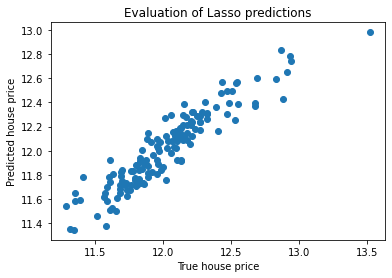

In [11]:
#Lets evaluate the predictions with respect to original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True house price')
plt.ylabel('Predicted house price')
plt.title('Evaluation of Lasso predictions')

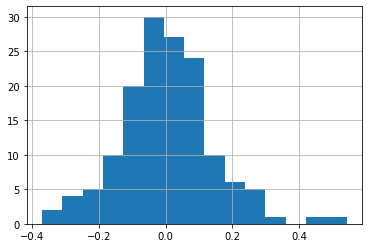

In [12]:
#Lets evaluate teh distributions of the error : they should be  fairly normall distributed

errors = y_test-lin_model.predict(X_test)
errors.hist(bins = 15)

# Features importance

Text(0.5, 1.0, 'faetture importance')

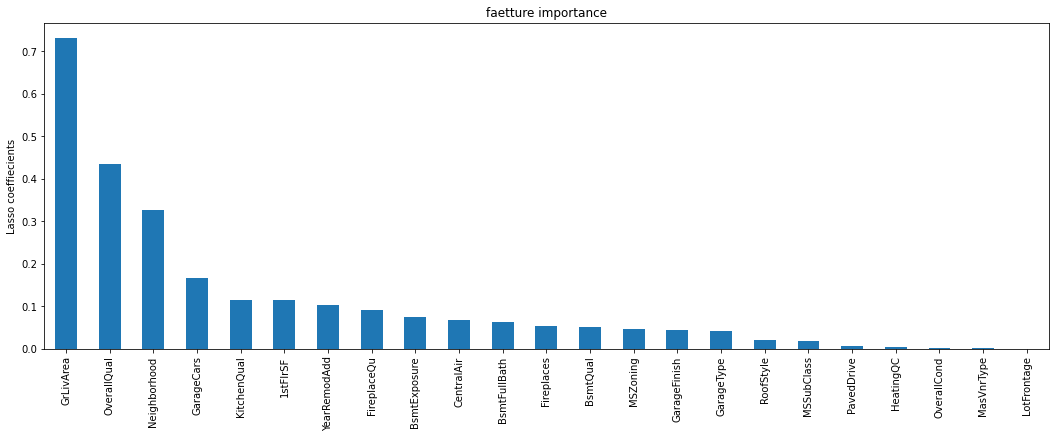

In [13]:
#Finally lets for fun look at the feature impooirrtancxe
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features

importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (18, 6))
plt.ylabel('Lasso coeffiecients')
plt.title('faetture importance')
                    